Text(0.5, 1.0, 'Thresholded Image')

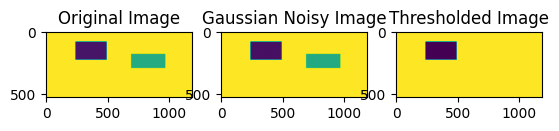

In [1]:
import cv2
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

#Load the image
img = cv2.imread('image.jpg',0)

#Add Gaussian noise to the image
noise = np.random.normal(0, 1, img.shape)
noisy_img = img + noise

#Convert the image type to CV_8UC1
noisy_img = cv2.convertScaleAbs(noisy_img)

#Implement Otsu's thresholding algorithm
#Threshold the image using Otsu's thresholding algorithm to obtain a binary image
threshold_value, threshold_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Display the original image, noisy image, and thresholded image
fig,arr= plt.subplots(1,3)

arr[0].imshow(img)
arr[0].set_title('Original Image')

arr[1].imshow(noisy_img)
arr[1].set_title('Gaussian Noisy Image')

arr[2].imshow(threshold_img)
arr[2].set_title('Thresholded Image')


C:\Users\J C\AppData\Local\Temp\ipykernel_9256\425551905.py:26: RuntimeWarning: overflow encountered in ubyte_scalars
  if mask[pixel] == 0 and abs(img[pixel] - img[seed]) <= threshold:


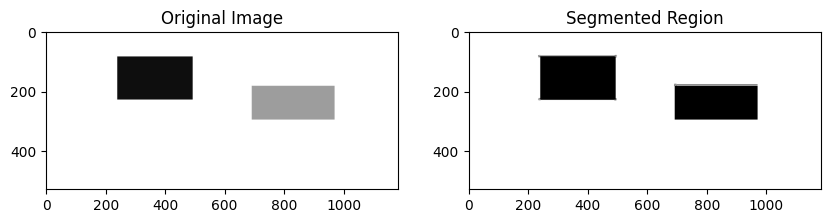

In [5]:
#Load the image and necessary libraries
import cv2
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

#Load the image as grayscale
img = cv2.imread('image.jpg',0)

#Select a seed pixel within the object of interest
seed = (50, 50)

#Define a threshold range of pixel values around the seed pixel
threshold = 10

#Initialize an empty mask of the same shape as the input image
mask = np.zeros_like(img)

#Initialize a list of neighboring pixels to the seed pixel
neighbors = [seed]

#While the list of neighboring pixels is not empty:
while neighbors:
    pixel = neighbors.pop()
# If the pixel is not already marked in the mask and its value falls within the threshold range:
    if mask[pixel] == 0 and abs(img[pixel] - img[seed]) <= threshold:
    # Add the pixel to the segmented region and mark it in the mask
        mask[pixel] = 255

    # Add all unmarked neighboring pixels to the list
        x, y = pixel
        for i in range(-1, 2):
             for j in range(-1, 2):
                 if i == 0 and j == 0:
                     continue
                 if 0 <= x+i < img.shape[0] and 0 <= y+j < img.shape[1]:
                     if mask[x+i, y+j] == 0:
                         neighbors.append((x+i, y+j))

# Pop a neighboring pixel from the list

#Display the original image and the segmented region
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Segmented Region')

plt.show()
